In [290]:
import pandas as pd
from IPython.core.display import display
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn

In [291]:
df_patches_raw = pd.read_pickle('../testData/patches_clustered/5759068.pkl')

In [292]:
# add time in next bout
df_patches_raw['next_n'] = df_patches_raw['n'].shift(-1)
#df_patches_raw['next_n_clipped'] = df_patches_raw['n_clipped'].shift(-1)

In [293]:
listensPerPatch = df_patches_raw.groupby('patch_clust')['n'].sum()
overall_prop = listensPerPatch/float(df_patches_raw['n'].sum())
#overall_prop_exploit = listensPerPatch/float(df_patches.dropna()['n'].sum())
overall_prop.name = 'final_value'
#overall_prop_exploit.name = 'final_value_exploit'
df_patches_raw = df_patches_raw.join(overall_prop,on='patch_clust')#.join(overall_prop_exploit,on='patch_clust')


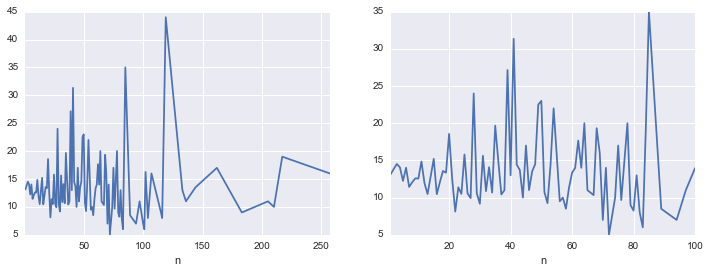

In [308]:
# time in next exploit patch as function of exploration time
fig,axes = plt.subplots(1,2,figsize=(12,4))
#df_patches_raw[np.isnan(df_patches_raw['patch_clust'])].groupby('n')['next_n'].mean().plot(ax=ax)
#ax.set_xlim(0,100)
result = df_patches_raw[np.isnan(df_patches_raw['patch_clust'])].groupby('n')['next_n'].mean()
result.plot(ax=axes[0])
df_patches_raw[np.isnan(df_patches_raw['patch_clust'])].groupby(df_patches_raw['n'].apply(lambda n: n if n<=100 else 100))['next_n'].mean().plot(ax=axes[1])
#axes[0].set_xlim(0,100)


In [322]:
'.'.join(["{}:{}".format(a,b) for a,b in result.iteritems()])

'1:13.1393939394.2:13.8560606061.3:14.5169491525.4:14.0689655172.5:12.2448979592.6:14.0188679245.7:11.435483871.8:12.0666666667.9:12.5833333333.10:12.5625.11:14.8536585366.12:11.9375.13:10.4838709677.14:12.8260869565.15:15.2083333333.16:10.4583333333.17:12.0740740741.18:13.5769230769.19:13.35.20:18.5714285714.21:12.5333333333.22:8.125.23:11.3846153846.24:10.5.25:15.8.26:10.5714285714.27:9.92857142857.28:24.0.29:10.5833333333.30:9.16666666667.31:15.625.32:10.8571428571.33:14.0909090909.34:10.6666666667.35:19.6666666667.36:14.9285714286.37:10.4285714286.38:11.0.39:27.1428571429.40:13.0.41:31.3333333333.42:14.4285714286.43:13.7142857143.44:10.0.45:17.0.46:11.0.47:13.5.48:14.5.49:22.5.50:23.0.51:10.75.52:9.25.53:14.4285714286.54:22.0.56:9.5.57:10.0.58:8.5.59:11.3333333333.60:13.3333333333.61:14.0.62:17.6666666667.63:14.0.64:20.0.65:11.0.67:10.3333333333.68:19.3333333333.69:16.0.70:7.0.71:14.0.72:5.0.74:10.0.75:17.0.76:9.66666666667.78:20.0.79:9.0.80:8.25.81:13.0.82:8.0.83:6.0.84:19.5.85:35

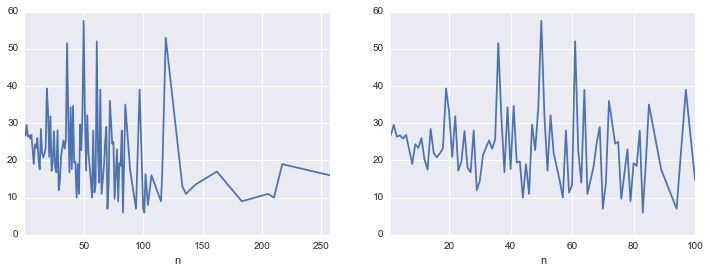

In [295]:
# total time exploiting as a function of time exploring
df_patches_raw['explore'] = np.isnan(df_patches_raw['patch_clust']).astype(int)
df_patches_raw['explore-idx'] = df_patches_raw['explore'].cumsum()
grp_explore = df_patches_raw.groupby('explore-idx').apply(lambda df: pd.DataFrame({'n':[df['n'].iloc[0]],'n-exploit':[df['n'][1:].sum()]}))
fig,axes = plt.subplots(1,2,figsize=(12,4))
grp_explore.groupby('n')['n-exploit'].mean().plot(ax=axes[0])
grp_explore.groupby(grp_explore['n'].apply(lambda n: n if n<=100 else 100))['n-exploit'].mean().plot(ax=axes[1])

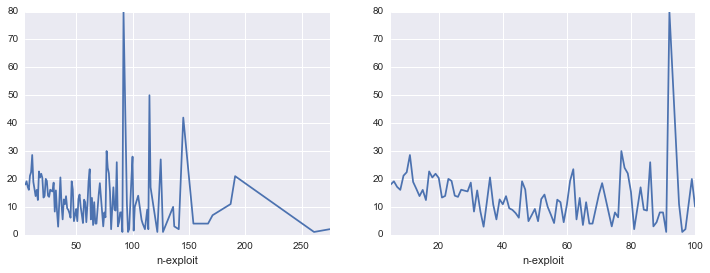

In [285]:
# exploration time as a function of exploitation time
#df_patches_raw['exploit-idx'] = df_patches_raw['explore-idx'].shift(1)
#df_patches_raw
grp_exploit = grp_explore.copy()
grp_exploit['n-explore'] = grp_exploit['n'].shift(-1)

fig,axes = plt.subplots(1,2,figsize=(12,4))
grp_exploit.groupby('n-exploit')['n-explore'].mean().plot(ax=axes[0])
grp_exploit.groupby(grp_exploit['n-exploit'].apply(lambda n: n if n<=100 else 100))['n-explore'].mean().plot(ax=axes[1])

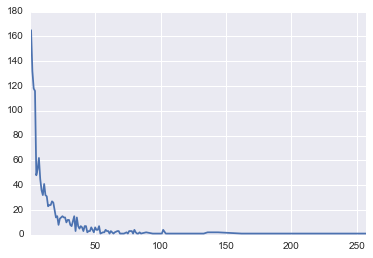

In [324]:
# prob exploit given explore time
explore_only = df_patches_raw[np.isnan(df_patches_raw['patch_clust'])]
explore_only['n'][:-1].value_counts().sort_index().plot()

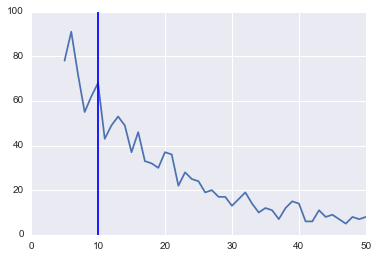

In [330]:
# prob explore given exploit time
grp_explore['n-exploit'][grp_explore['n-exploit']>0].value_counts().sort_index().plot()
plt.gca().set_xlim(0,50)
plt.gca().axvline(10)


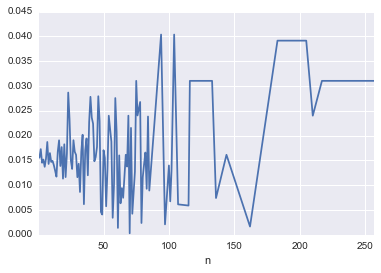

In [307]:
# patch value as a function of exploration time
df_patches_raw['final_value_next'] = df_patches_raw['final_value'].shift(-1)
df_patches_raw[np.isnan(df_patches_raw['patch_clust'])].groupby('n')['final_value_next'].mean().plot()

,centroid,diversity,n,start_ts,patch_clust,next_n,final_value,explore,explore-idx,final_value_next
0,"[0.00220395499965, 0.00644255506066, 0.0079506...",0.730417,69,2007-02-24 22:54:28,NaN,16.0,NaN,1,1,0.024017
1,"[5.32254464546e-06, 0.00297989085737, 9.176801...",0.000000,16,2007-02-26 07:07:20,91.0,13.0,0.024017,0,1,0.008550
2,"[1.79202689245e-07, 0.017360152999, 1.79202689...",0.000000,13,2007-02-26 09:01:11,53.0,12.0,0.008550,0,1,NaN
3,"[0.00053988837863, 0.00230712601993, 0.0017630...",0.718714,12,2007-02-26 20:55:48,NaN,8.0,NaN,1,2,0.015009
4,"[4.18075798112e-08, 4.18075798112e-08, 6.05708...",0.000000,8,2007-02-27 04:25:49,90.0,24.0,0.015009,0,2,0.021553
5,"[0.00274972236358, 0.000955550863693, 0.003491...",0.000000,24,2007-02-27 05:19:15,128.0,3.0,0.021553,0,2,NaN
6,"[0.0019293407964, 0.0155826688396, 0.000162418...",0.170463,3,2007-02-27 18:58:54,NaN,11.0,NaN,1,3,0.021553
7,"[0.00274972236358, 0.000955550863693, 0.003491...",0.000000,11,2007-02-28 01:51:39,128.0,63.0,0.021553,0,3,NaN
8,"[0.00223568466209, 0.00759385656061, 0.0094159...",0.686098,63,2007-02-28 03:07:59,NaN,14.0,NaN,1,4,0.008550
9,"[2.19839174458e-07, 0.0184632976208, 2.1983917...",0.012615,14,2007-03-02 04:17:48,53.0,2.0,0.008550,0,4,NaN
